In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
from scipy import interpolate
from scipy.optimize import curve_fit

In [14]:
def fill_nan(A):
    '''
    interpolate to fill nan values
    '''
    inds = np.arange(A.shape[0])
    good = np.where(np.isfinite(A))
    f = interpolate.interp1d(inds[good], A[good],bounds_error=False)
    B = np.where(np.isfinite(A),A,f(inds))
    return B

def points_d(table, freq=1, smooth_width=None):
    r = table['t']
    res = 1/(2*np.diff(list(r)))*freq
    res = fill_nan(res)
    r = fill_nan(np.array(r))
    return r[:-1], uniform_filter1d(res, smooth_width) if smooth_width else res

def points(table):
    r = table['t']
    return list(r), range(len(r))
#%matplotlib widget

def plot_coords(data, name=None, title='', sm_w=3, freq=1, approx=None, axes=None, label="Измерение"):
    if axes is None:
        fig = plt.figure(figsize=(10, 7))

        axes = fig.subplots(2)
    
        axes[0].set_title(title)
    axes[0].scatter(*points(data))
    axes[0].set_ylabel('Число оборотов')
    axes[0].set_xlabel('Время, с')

    
    axes[1].set_ylabel('Частота, Гц')
    axes[1].set_xlabel('Время, с')
    speed = points_d(data, smooth_width=sm_w, freq=freq)
    axes[1].plot(*speed, label=label)
    axes[1].set_ylim(bottom=0)
    
    if name and not axes: fig.savefig("img/" + name + '.png')
    if approx:
        res, err = curve_fit(approx, *speed)
        axes[1].plot(speed[0], approx(speed[0], *res), ':', label="Аппроксимация")
        axes[1].legend()
        return res

array([0.33665191])

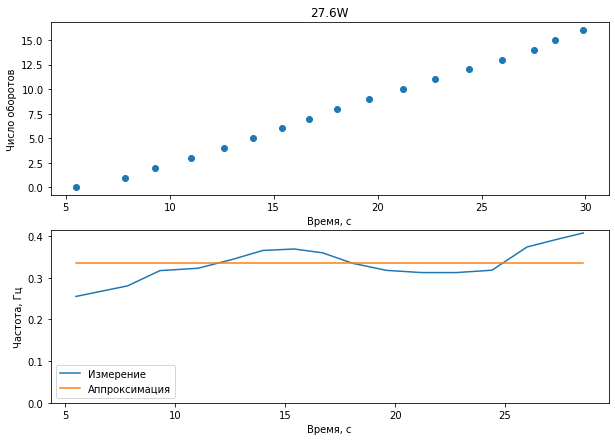

In [67]:
plot_coords(pd.read_csv("data/η", delimiter=";", comment = "#"), 'η', title='27.6W', approx=lambda x, C: x*0 + C)

array([0.40112962])

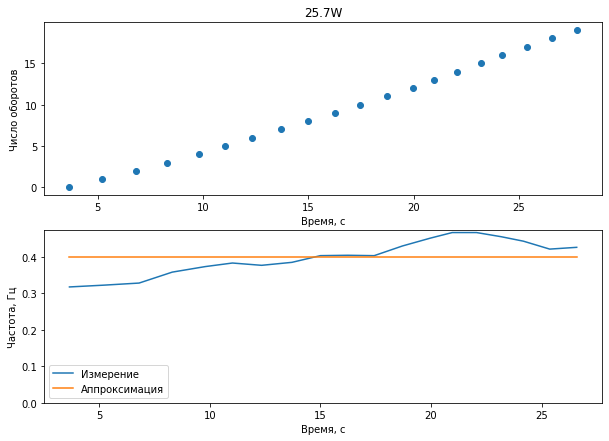

In [68]:
plot_coords(pd.read_csv("data/n2", delimiter=";", comment = "#"), 'η2', "25.7W", approx=lambda x, C: x*0 + C)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


array([0.05472931, 0.7297255 ])

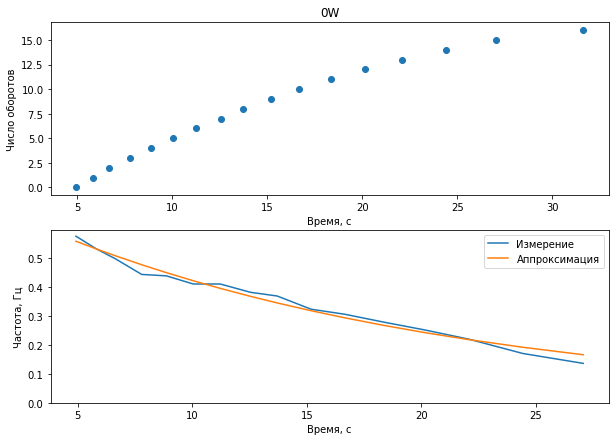

In [75]:

plot_coords(pd.read_csv("data/Торможение прогресса", delimiter=";", comment = "#"), 'Тормоз', "0W",
            approx=lambda x, B, C: C*np.exp(-B*x))

array([0.42446957])

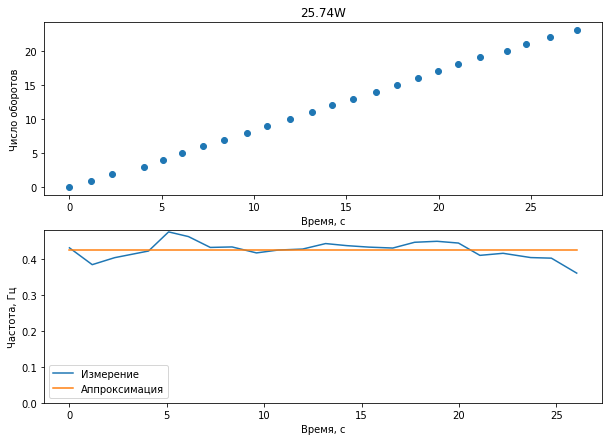

In [76]:
plot_coords(pd.read_csv("data/Загадочное измерение", delimiter=";", comment = "#"), 'Тормоз', "25.74W",
           approx=lambda x, C: x*0 + C)

array([0.02234491, 0.0390167 ])

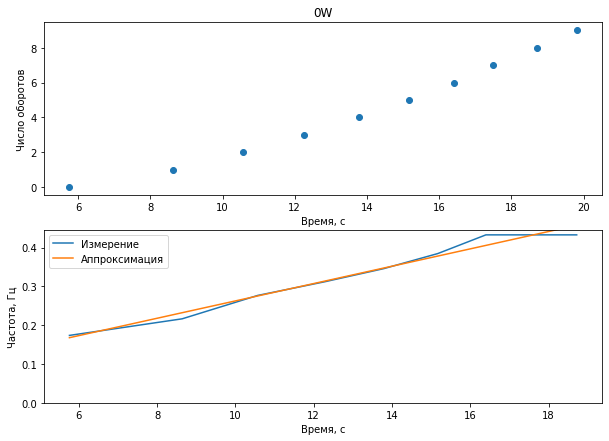

In [80]:

plot_coords(pd.read_csv("data/Взеты и паденения Османскорй империи", delimiter=";", comment = "#"), 'Падение', "0W", sm_w=2,
           approx=lambda x, B, C: B*x + C)

In [6]:
rots = pd.read_csv("data/Обороты", delimiter=";", comment = "#")

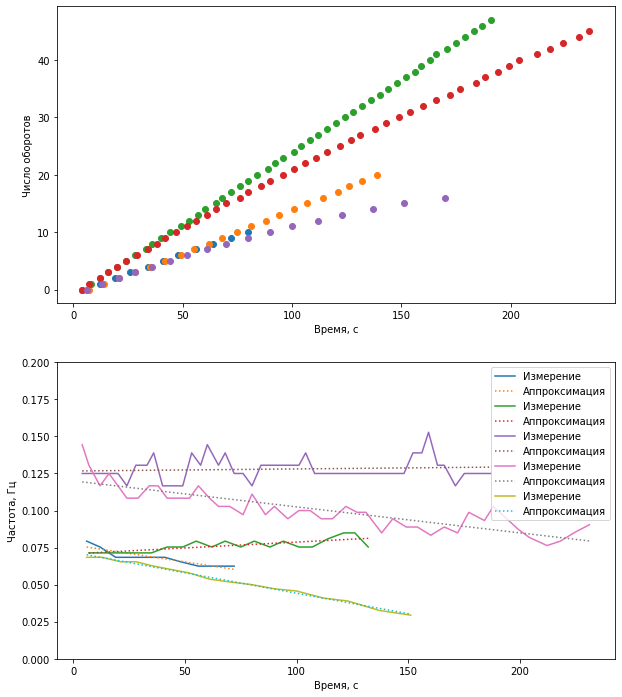

In [18]:
import re

def convert_time(s):
    if type(s) == float: return s
    t = re.match("(-?\d\d?):(\d\d(.\d+)?)", s)
    if t == None:
        return float(s)
    t = t.groups()
    return int(t[0])*60 + float(t[1])


fig = plt.figure(figsize=(10, 12))
axes = fig.subplots(2)

for i in rots.groupby('n'):
    i = i[1]
    i['t'] = i['time'].apply(convert_time)
    plot_coords(i, axes=axes, approx=lambda x, B, C: B*x + C)
axes[1].set_ylim(bottom=0, top = 0.2)
# plt.legend()
#    plt.plot(*points_d(i, freq=10))
plt.savefig('img/coords.png')

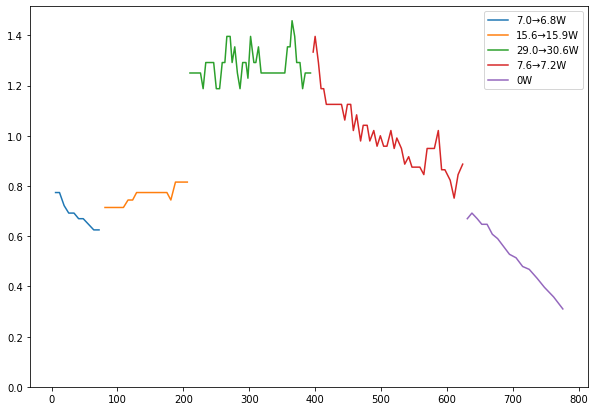

In [10]:


plt.figure(figsize=(10, 7))
t = 0
c = 0
names = ['7.0→6.8W', '15.6→15.9W', '29.0→30.6W', '7.6→7.2W', '0W']
for i in rots.groupby('n'):
    i = i[1]
    
    i['t'] = i['time'].apply(convert_time) + t
    t += np.array(i['t'])[-1] - np.array(i['t'])[0]
    plt.plot(*points_d(i, freq=10, smooth_width=4), label=names[c])
    c += 1
plt.legend()
plt.ylim(bottom=0)
plt.savefig('img/speeds.png')

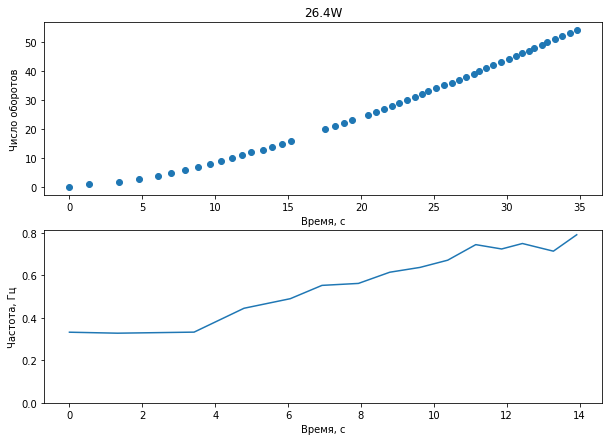

In [11]:
plot_coords(pd.read_csv("data/раскрутка_1", delimiter=";", comment = "#"), 'Крут_1', "26.4W")

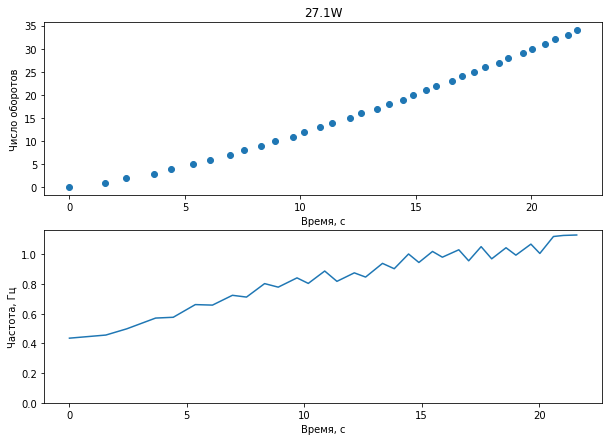

In [12]:
plot_coords(pd.read_csv("data/раскрутка_2", delimiter=";", comment = "#"), 'Крут_2', "27.1W", sm_w=5)

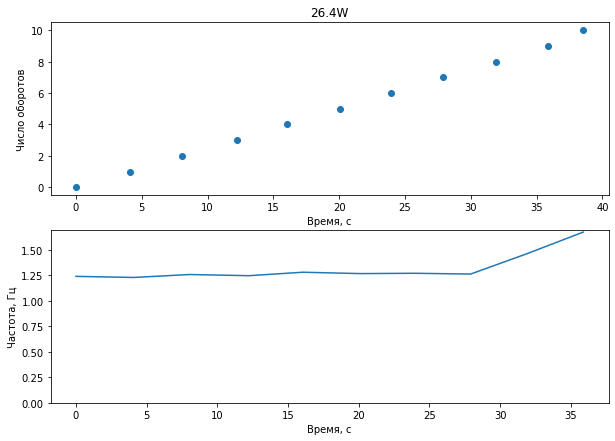

In [56]:
plot_coords(pd.read_csv("data/раскрутка_3", delimiter=";", comment = "#"), 'Крут_3', "26.4W", freq=10)

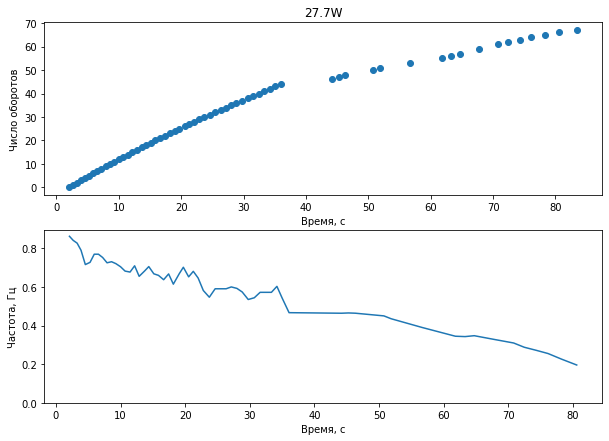

In [59]:
d = pd.read_csv("data/обращение", delimiter=";", comment = "#")
d['t'] = d['t'].apply(convert_time)
plot_coords(d, 'Оборотень', "27.7W", sm_w=2)

In [43]:
fill_nan(np.array([1, float('nan'), 2]))

array([1. , 1.5, 2. ])